### Prepare space in flash

In [1]:
import os, subprocess

In [2]:
resultdir = "/bucket/ReiterU/DBS/analysis/220824_sup_fig_atlas"
if not os.path.exists(resultdir):
    subprocess.run(["ssh", "deigo", "mkdir", resultdir])

In [3]:
cwd = os.path.basename(os.getcwd())
tmpdir = os.path.join("/flash/ReiterU/tmp/", cwd, "average_brains")
if not os.path.exists(tmpdir):
    os.makedirs(tmpdir)

### Main

In [4]:
from probemapper.io import load_nifti, save_nifti
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import ndimage as ndi

In [5]:
data = [
    {
        "name": "L-J30",
        "path": "/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-F11",
        "path": "/bucket/ReiterU/DBS/data/20220526_P190_laqueus_DiI_L-F11/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-M4",
        "path": "/bucket/ReiterU/DBS/data/20220321_P177_laqueus_DiI_3-8_CUBIC/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-M23",
        "path": "/bucket/ReiterU/DBS/data/20220529_P191_laqueus_DiI_LM13/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-M27",
        "path": "/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-A1",
        "path": "/bucket/ReiterU/DBS/data/20220613_P200_laqueus_DiI_L-A1/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-A2",
        "path": "/bucket/ReiterU/DBS/data/20220518_P186_laqueus_DiI_L-A2/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-A11",
        "path": "/bucket/ReiterU/DBS/data/20220614_P201_laqueus_DiI_L-A11/analysis/ants/Warped.nii.gz",
    },
    {
        "name": "L-A29",
        "path": "/bucket/ReiterU/DBS/data/20220615_P202_laqueus_DiI_L-A29/analysis/ants/Warped.nii.gz",
    }
]

In [6]:
brains = []
for d in data:
    vol = load_nifti(d["path"])
    brains.append(vol)

In [7]:
t = np.stack(brains, axis=-1)
print(t.shape)

(480, 570, 450, 9)


In [8]:
ave = t.mean(axis=3)
std = t.std(axis=3)

In [9]:
save_nifti(ave, os.path.join(tmpdir, "average_brain.nii.gz"), 10, 10, 10)
save_nifti(std, os.path.join(tmpdir, "average_brain_std.nii.gz"), 10, 10, 10)

### Show the slices (average brain)

/home/t/tomoyuki-mano1/projects/probemapper/.env/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


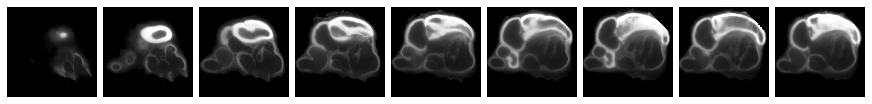

In [10]:
img = ave.copy()

# crop
img = img[70:, 30:440, 25:435]
# rotation
img = ndi.rotate(img, 225, axes=(0,1), reshape=False, order=3)
img = ndi.rotate(img, 5, axes=(0,2), reshape=False, order=3)

# flip
img = img[:, ::-1, :]
img = img.astype("float")

# gamma correction
img = np.power(img, 1/2.0)

cmap = matplotlib.cm.get_cmap("gray").copy()
cmap.set_bad("black")

fig, axs = plt.subplots(1,9, figsize=(12,5), constrained_layout=True)
for (i, sl) in enumerate(np.arange(70, 231, 20)):
    axs[i].imshow(img[:,:,sl], vmin=10, vmax=150, cmap=cmap)
    axs[i].axis("off")

plt.savefig(os.path.join(tmpdir, "ave_sagitall_sections.pdf"), dpi=300, bbox_inches="tight")
plt.show()

### Show the slices (STD)

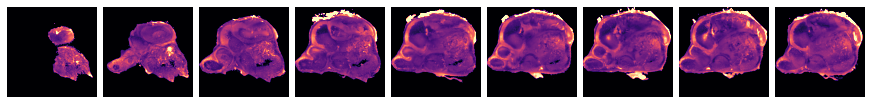

In [11]:
ave2 = ave.copy()
std2 = std.copy()
std2[ave<500] = 0
ave2[ave==0] = np.inf

img = std2 / ave2

# crop
img = img[70:, 30:440, 25:435]
# rotation
img = ndi.rotate(img, 225, axes=(0,1), reshape=False, order=3)
img = ndi.rotate(img, 5, axes=(0,2), reshape=False, order=3)

# flip
img = img[:, ::-1, :]
img = img.astype("float")

cmap = matplotlib.cm.get_cmap("magma").copy()
cmap.set_bad("black")

fig, axs = plt.subplots(1,9, figsize=(12,5), constrained_layout=True)
for (i, sl) in enumerate(np.arange(70, 231, 20)):
    axs[i].imshow(img[:,:,sl], vmin=0, vmax=1.0, cmap=cmap)
    axs[i].axis("off")

plt.savefig(os.path.join(tmpdir, "std_sagitall_sections.pdf"), dpi=300, bbox_inches="tight")
plt.show()

### Copy data to bucket

In [12]:
subprocess.run(["scp", "-r", tmpdir, f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '-r', '/flash/ReiterU/tmp/220824_sup_fig_atlas/average_brains', 'deigo:/bucket/ReiterU/DBS/analysis/220824_sup_fig_atlas'], returncode=0)